In [2]:
! pip install numpy
! pip install pandas

In [3]:
! pip install matplotlib
! pip install seaborn
! pip install  scikit-learn
! pip install imblearn

Import libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

Load Data

In [5]:
df = pd.read_csv("dataset\diabetes_prediction_dataset.csv")

In [6]:
df.head

<bound method NDFrame.head of        gender   age  hypertension  heart_disease smoking_history   bmi  \
0      Female 80.00             0              1           never 25.19   
1      Female 54.00             0              0         No Info 27.32   
2        Male 28.00             0              0           never 27.32   
3      Female 36.00             0              0         current 23.45   
4        Male 76.00             1              1         current 20.14   
...       ...   ...           ...            ...             ...   ...   
99995  Female 80.00             0              0         No Info 27.32   
99996  Female  2.00             0              0         No Info 17.37   
99997    Male 66.00             0              0          former 27.83   
99998  Female 24.00             0              0           never 35.42   
99999  Female 57.00             0              0         current 22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0             6.60           

EXPLORATORY DATA ANALYSIS

1. Data Quality
   

Handling Duplicates

In [7]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [8]:
df = df.drop_duplicates()

Uniqueness

In [9]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


Missing Values

In [10]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [11]:
# Remove Unneccessary value [0.00195%]
df = df[df['gender'] != 'Other']

Describe the Data

In [12]:
! pip install Jinja2

In [13]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


2. Univariate Analysis

Histogram for age

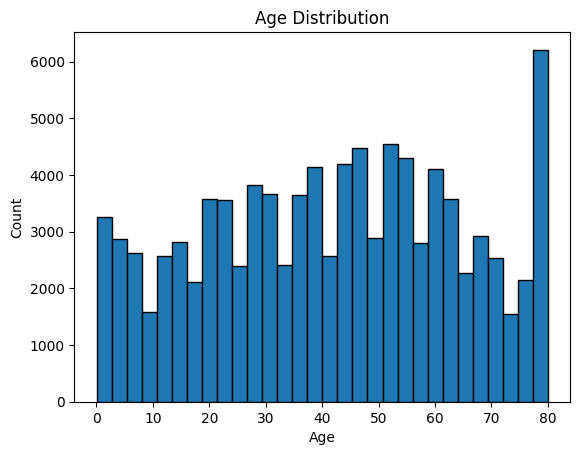

In [14]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Bar plot for gender

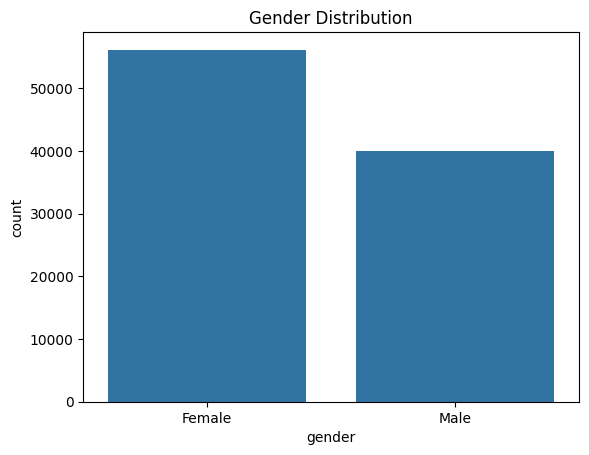

In [15]:
# Bar plot for gender
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

Distribution plot for BMI

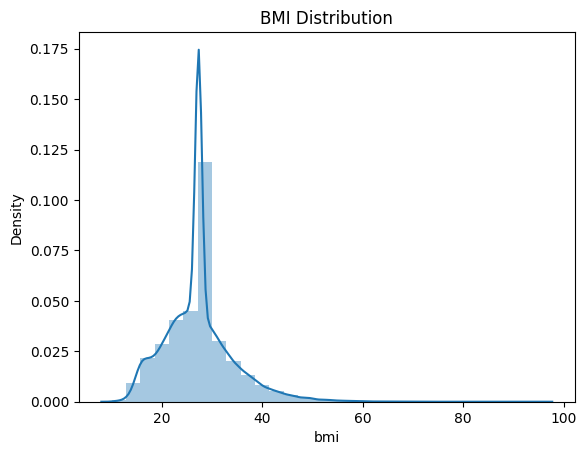

In [16]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

Count plots for binary variables

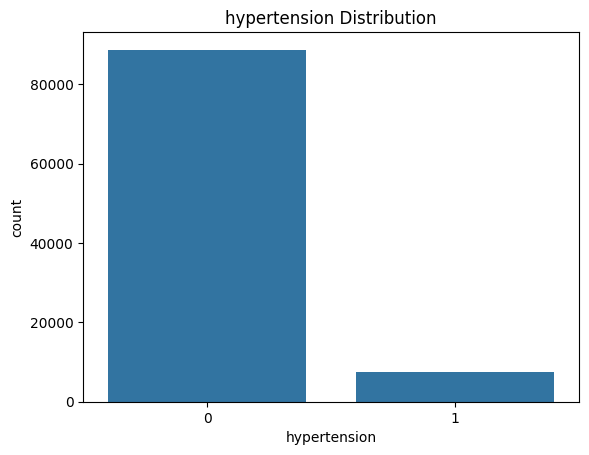

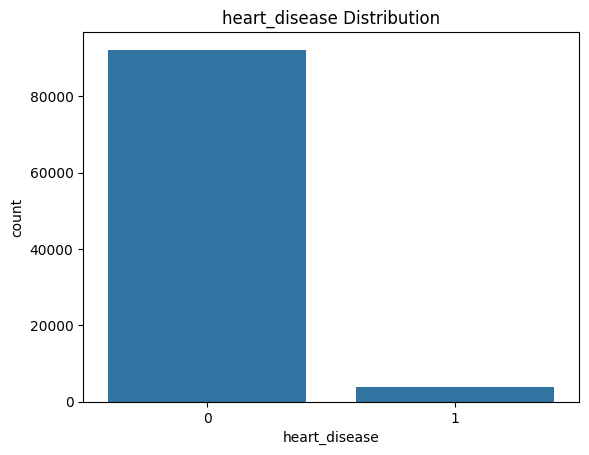

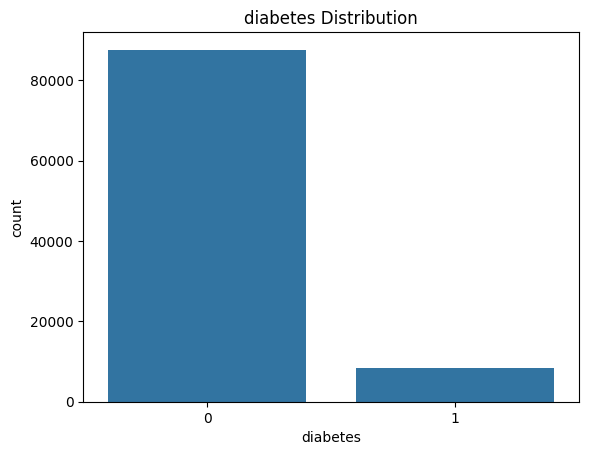

In [17]:
# Count plots for binary variables
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

Count plot for smoking history

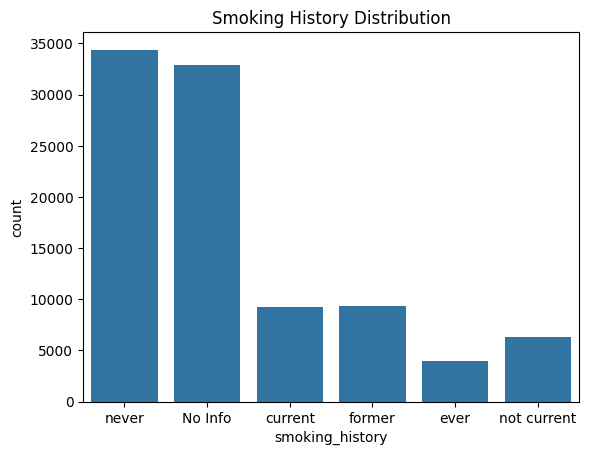

In [18]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

Boxplot BMI vs Diabetes classification

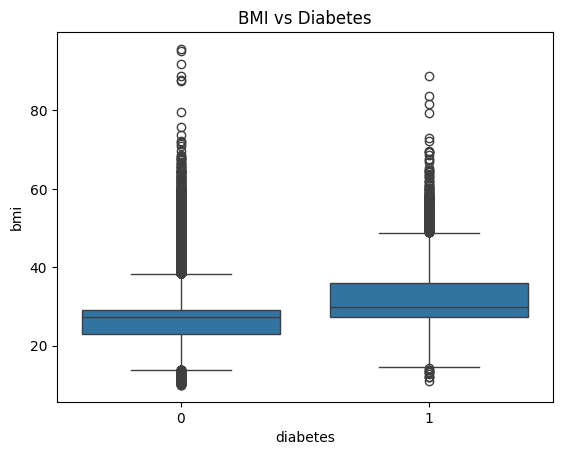

In [19]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

Boxplot Age vs Diabetes classification

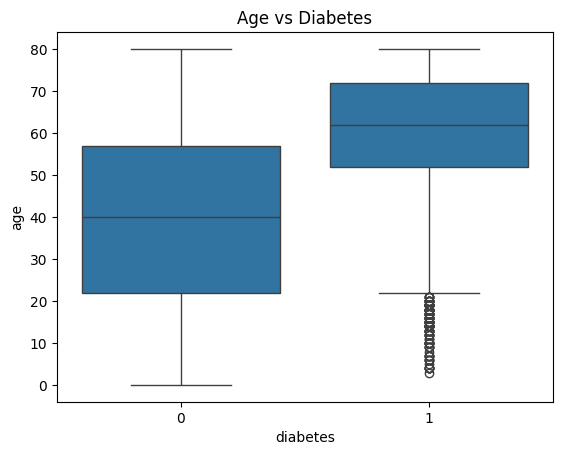

In [20]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

Count plot of gender vs diabetes

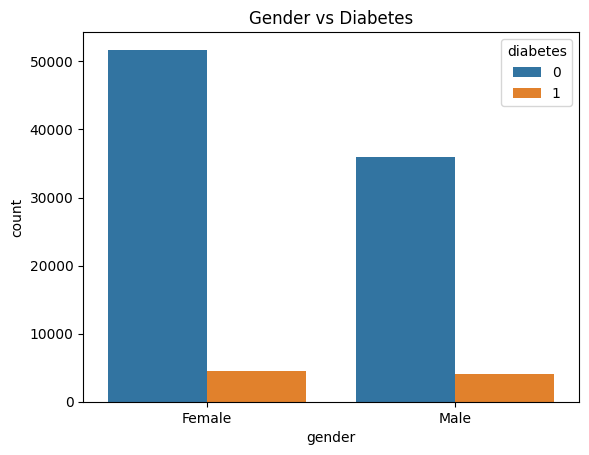

In [21]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

Boxplot HbA1c level vs Diabetes classification

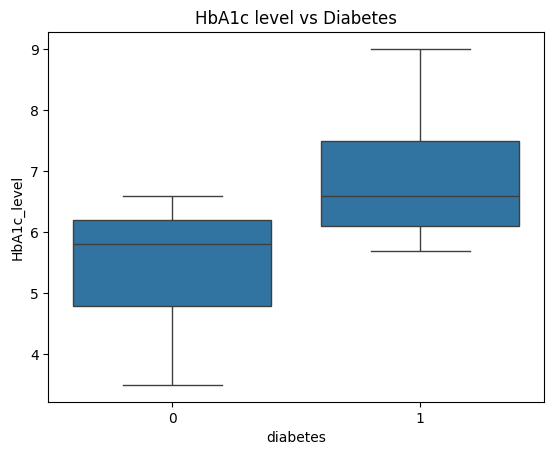

In [22]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

Boxplot blood glucose level vs Diabetes classification

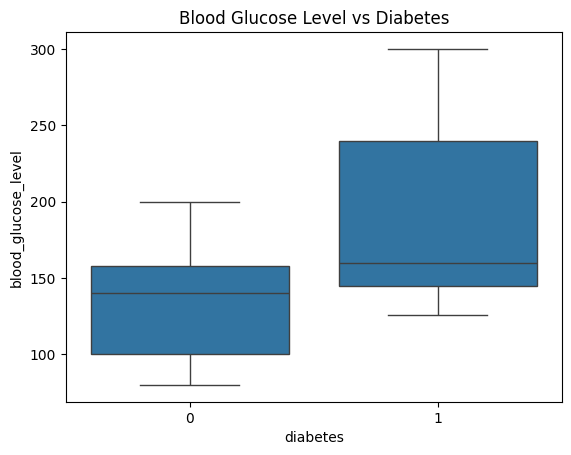

In [23]:
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

Pair plot for numeric features

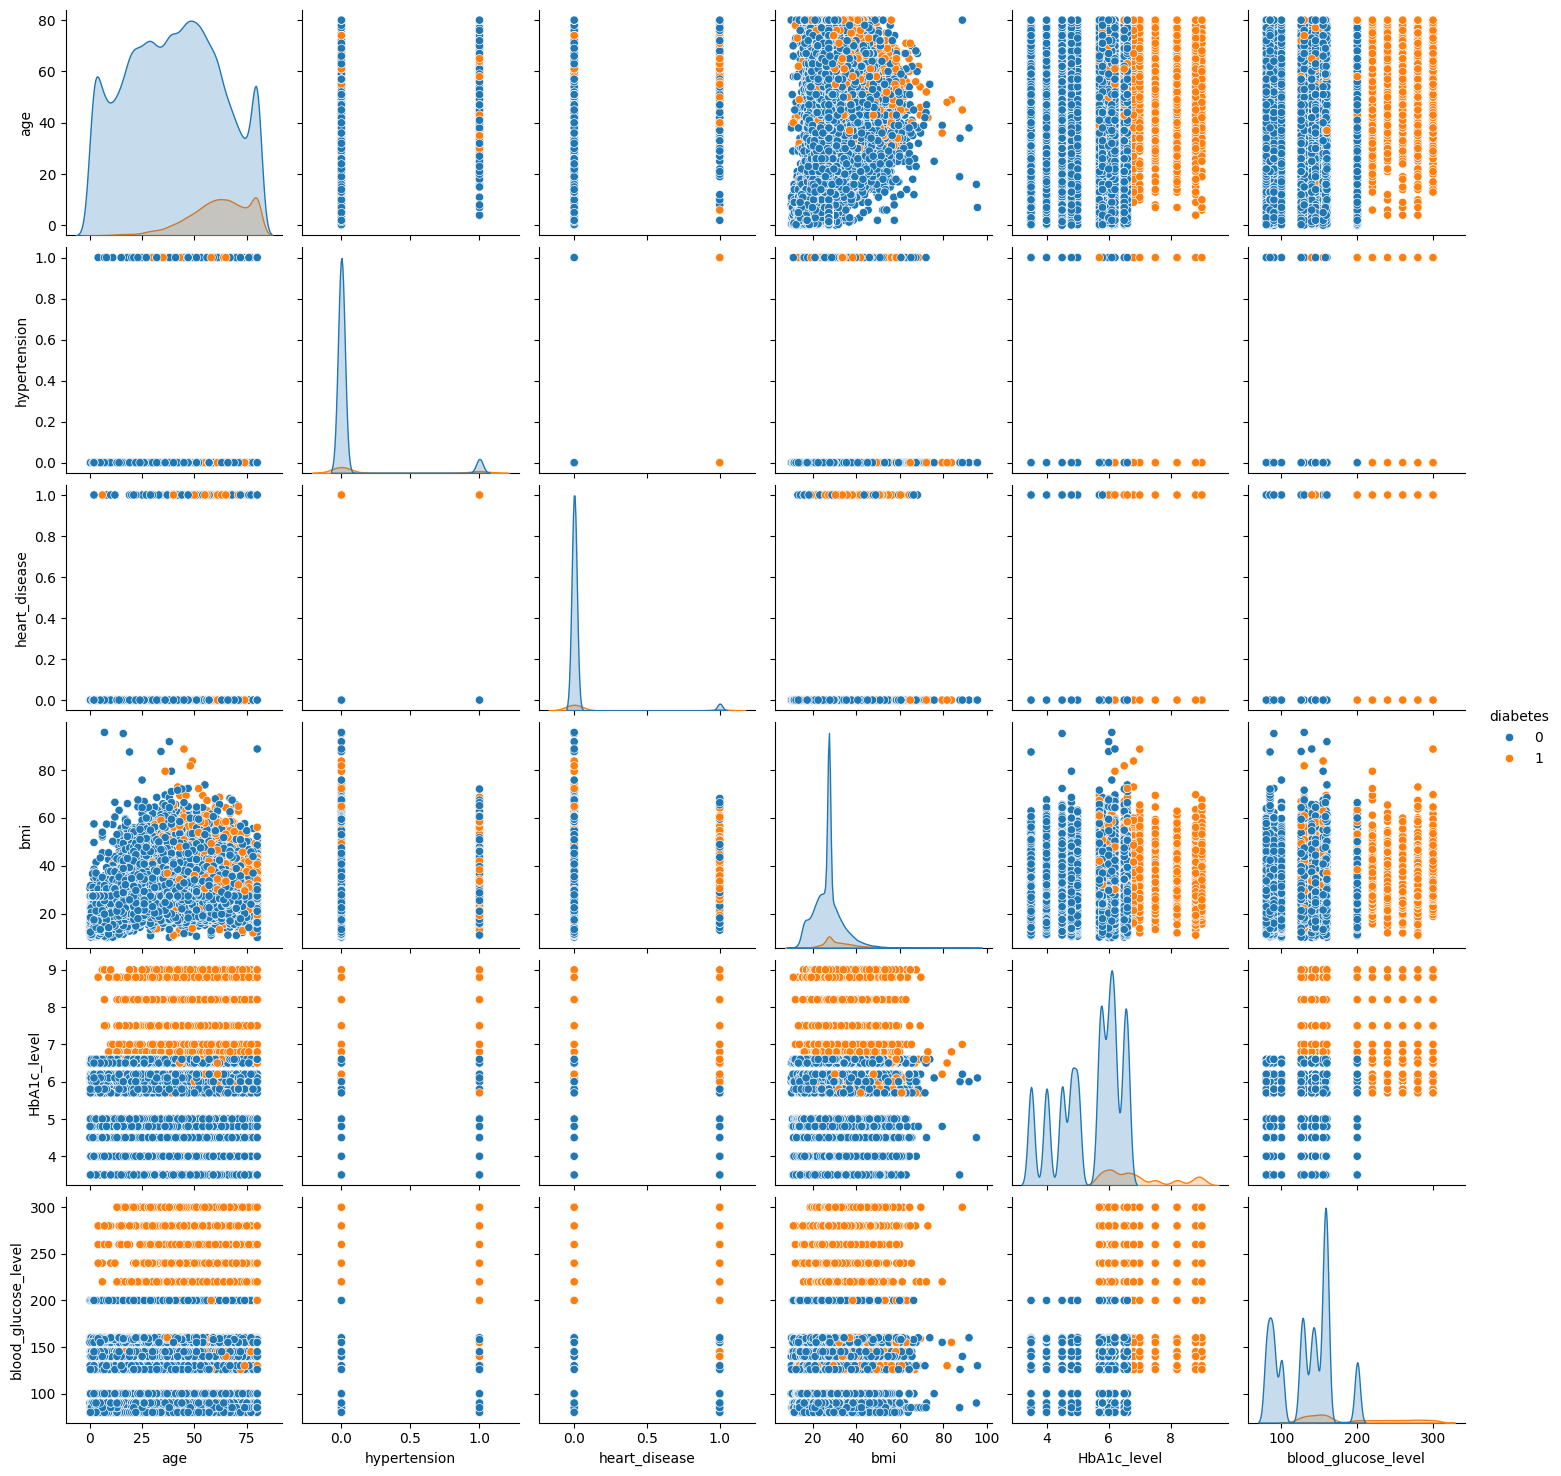

In [24]:
# Pair plot for numeric features
sns.pairplot(df, hue='diabetes')
plt.show()

4. Multivariate analysis

Scatterplot Age vs BMI colored by Diabetes classification

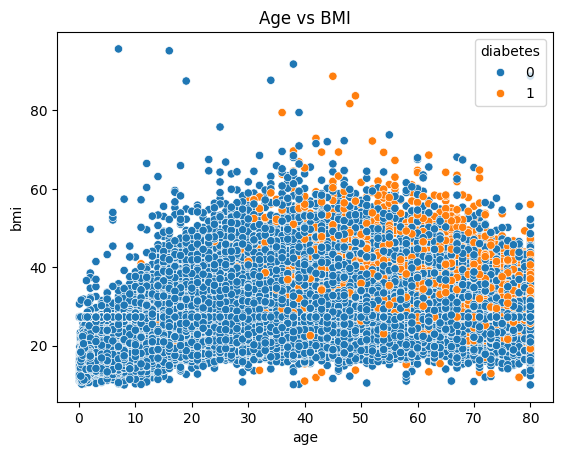

In [25]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

Violin plot of BMI against diabetes classification split by gender

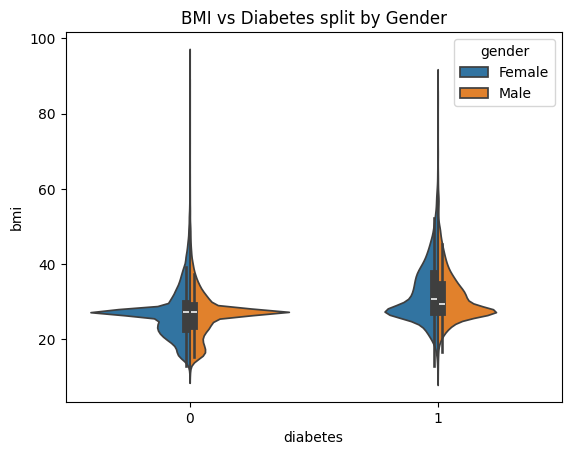

In [26]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

Interaction between gender, BMI and diabetes

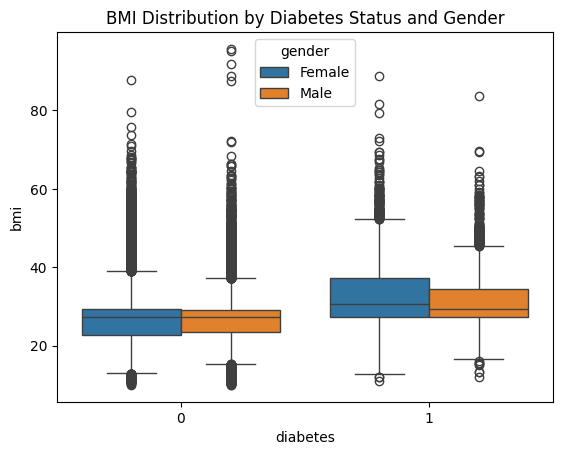

In [27]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

Interaction between gender, Age and diabetes

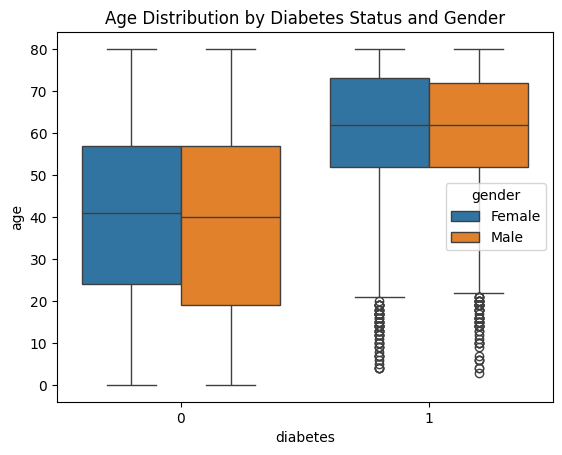

In [28]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

2 | CORRELATION

I | Data preparation

In [29]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [30]:
data = df.copy()

II | Encoding

In [31]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

III | Correlation Matrix

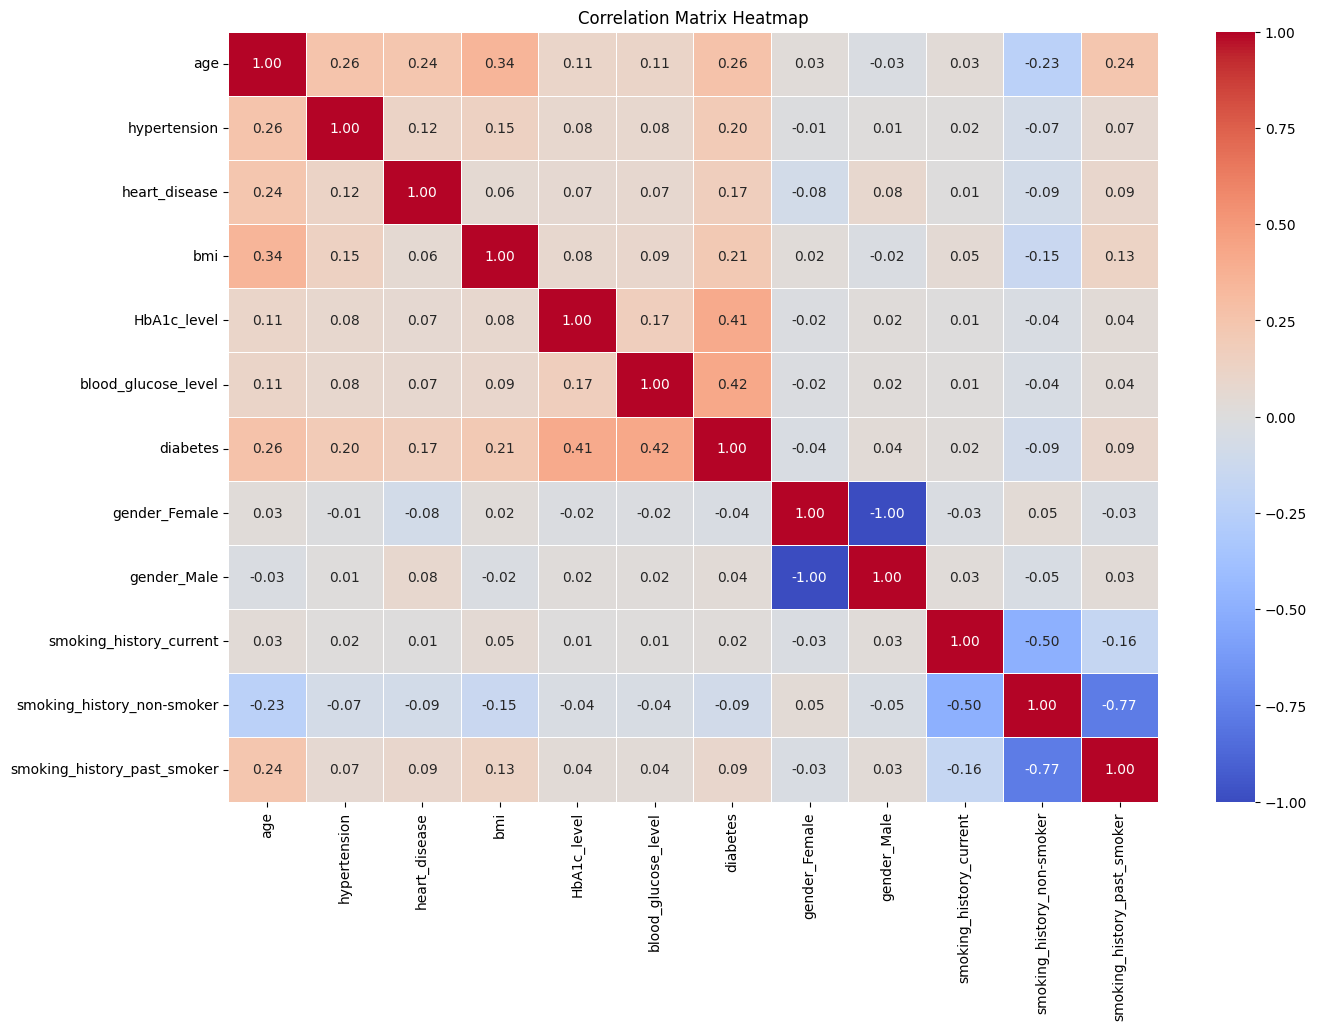

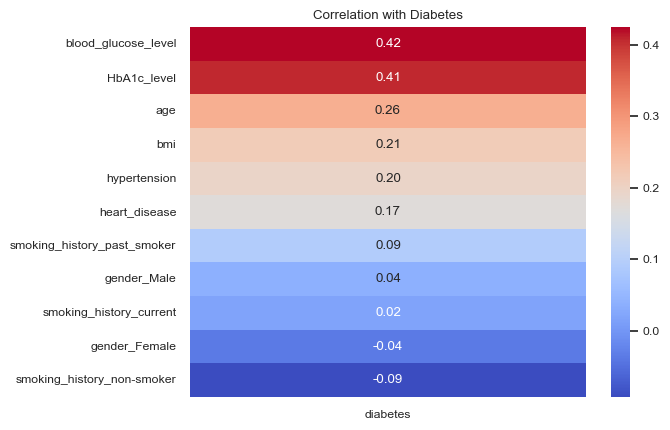

In [32]:
# Compute the correlation matrix
correlation_matrix = data.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


#Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

3 | PREDICTIVE ANALYSIS

1. Class Imbalance

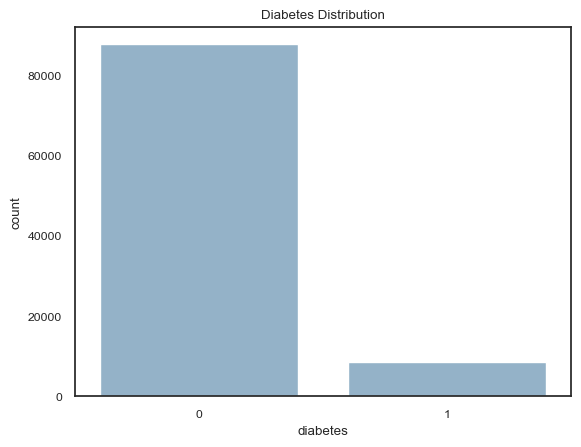

In [33]:
# Count plot for the 'diabetes' variable
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [34]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

2.Preprocessing : Scaler

In [35]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']
print(X)
print(y)

       gender   age  hypertension  heart_disease smoking_history   bmi  \
0      Female 80.00             0              1      non-smoker 25.19   
1      Female 54.00             0              0      non-smoker 27.32   
2        Male 28.00             0              0      non-smoker 27.32   
3      Female 36.00             0              0         current 23.45   
4        Male 76.00             1              1         current 20.14   
...       ...   ...           ...            ...             ...   ...   
99994  Female 36.00             0              0      non-smoker 24.60   
99996  Female  2.00             0              0      non-smoker 17.37   
99997    Male 66.00             0              0     past_smoker 27.83   
99998  Female 24.00             0              0      non-smoker 35.42   
99999  Female 57.00             0              0         current 22.43   

       HbA1c_level  blood_glucose_level  
0             6.60                  140  
1             6.60         

In [36]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

3. Model Building and Hyperparameter Tuning

In [37]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [38]:
# Create Grid Search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


In [54]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy:  0.9491833974825756
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.73      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



| Intepret the results

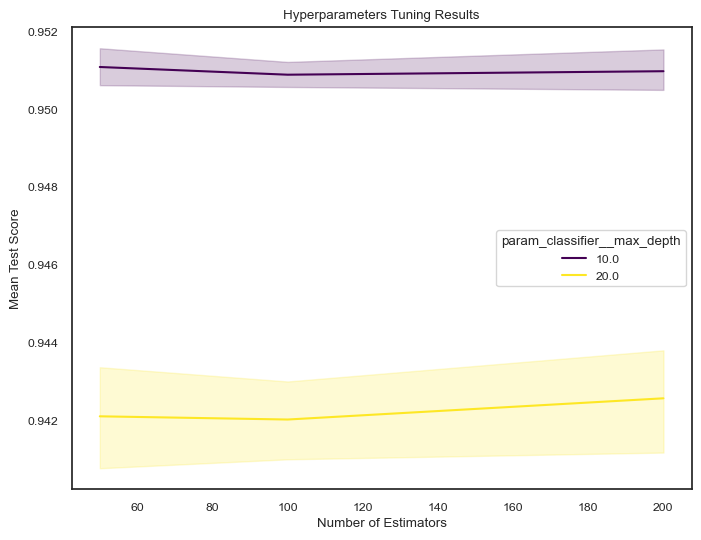

In [55]:
# Convert GridSearchCV results to a DataFrame and plot
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

4. Confusion Matrix

Model Accuracy:  0.9491833974825756
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.68      0.80      0.73      1701

    accuracy                           0.95     19226
   macro avg       0.83      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



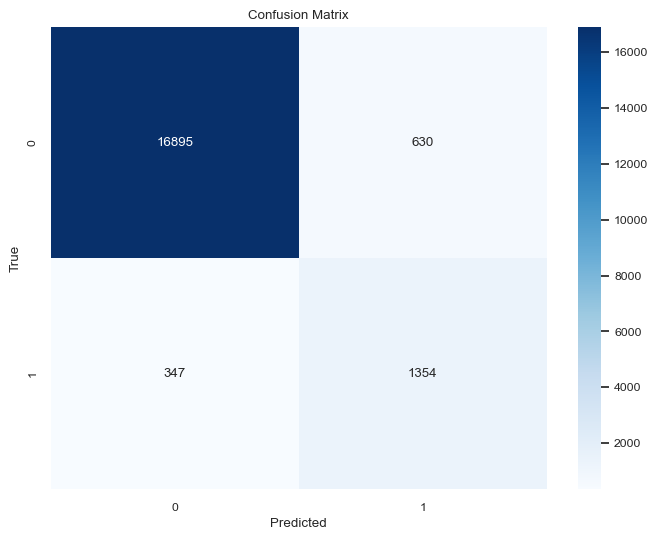

In [56]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

| Intepret the results 
Our trained Random Forest Model achieved an accuracy of around 95%. This indicates that the model correctly classified around 95% of all cases in the test set.

Looking deeper into the classification metrics, let's dissect the performance for each class (0 and 1) separately:

A | Class 0 (Non-diabetes): 
The model has a high precision (0.98) for class 0, meaning that among all instances where the model predicted non-diabetes, 98% were indeed non-diabetes.
The recall for class 0 is also high (0.96). This means that our model correctly identified 96% of all actual non-diabetes cases in the dataset.
B | Class 1 (Diabetes): 
The precision for class 1 is lower around (0.65), which indicates that when the model predicted diabetes, it was correct around 65% of the time.
However, the recall is reasonably high around (0.80). This means that our model was able to capture around 80% of all actual diabetes cases.
The F1 score, a harmonic mean of precision and recall, is around 0.97 for class 0 and around 0.72 for class 1. The weighted average F1 score is around 0.94, in line with the overall accuracy.

This discrepancy in performance between classes is likely due to the imbalance in the original dataset. Class 0 (Non-diabetes) is the majority class and has more examples for the model to learn from.

However, the higher recall for class 1 (Diabetes) is promising. This is an essential aspect for a healthcare model, as missing actual positive cases (false negatives) can have serious implications.

In [57]:
from joblib import dump
from joblib import load

# ... your model training and evaluation code ...

# Save the model to a file
dump(grid_search.best_estimator_, 'diabetes_prediction_model.joblib')

print("Model saved successfully!")

Model saved successfully!
